Epoch 1/1
100/100 [==============================] - 0s - loss: 12.4082 - acc: 0.0700     
(405, 335, 4)


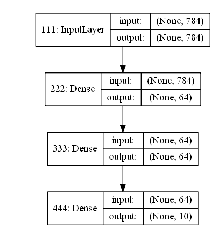

d:\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [8]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
# 这部分返回一个张量
inputs = Input(shape=(784,),name='111')

# 层的实例是可调用的，它以张量为参数，并且返回一个张量
x = Dense(64, activation='relu',name='222')(inputs)
x = Dense(64, activation='relu',name='333')(x)
predictions = Dense(10, activation='softmax',name='444')(x)
data = np.random.random(78400).reshape(100,784)
labels = np.random.random(1000).reshape(100,10)

# 这部分创建了一个包含输入层和三个全连接层的模型
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data, labels)  # 开始训练
from keras.utils import plot_model
plot_model(model,show_shapes=True)
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

lena = mpimg.imread('model.png') # 读取和代码处于同一目录下的.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
print(lena.shape) #(512, 512, 3)

plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
# plt.savefig('model2.png')
from scipy import misc
misc.imsave('model2.png', lena)

In [6]:
from keras.layers import TimeDistributed

# 输入张量是 20 个时间步的序列，每一个时间为一个 784 维的向量
input_sequences = Input(shape=(20, 784))

# 这部分将我们之前定义的模型应用于输入序列中的每个时间步。
# 之前定义的模型的输出是一个 10-way softmax，
# 因而下面的层的输出将是维度为 10 的 20 个向量的序列。
processed_sequences = TimeDistributed(model)(input_sequences)

In [11]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
import keras
# 标题输入：接收一个含有 100 个整数的序列，每个整数在 1 到 10000 之间。
# 注意我们可以通过传递一个 `name` 参数来命名任何层。
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# Embedding 层将输入序列编码为一个稠密向量的序列，每个向量维度为 512。
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM 层把向量序列转换成单个向量，它包含整个序列的上下文信息
lstm_out = LSTM(32)(x)

In [12]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

In [16]:
auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# 堆叠多个全连接网络层
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# 最后添加主要的逻辑回归层
main_output = Dense(1, activation='sigmoid', name='main_output')(x)
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])
# model.fit([headline_data, additional_data], [labels, labels],
#           epochs=50, batch_size=32)